In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [43]:
df =(pd.read_csv("./data/happiness.csv").drop(columns=["Standard Error","Dystopia Residual","Region"])
.rename(columns={"Economy (GDP per Capita)": "GDP",
                     "Health (Life Expectancy)": "Life",
                     "Trust (Government Corruption)": "Trust"}))

In [44]:
df.head()

,Country,Happiness Rank,Happiness Score,GDP,Family,Life,Freedom,Trust,Generosity
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          158 non-null    object 
 1   Happiness Rank   158 non-null    int64  
 2   Happiness Score  158 non-null    float64
 3   GDP              158 non-null    float64
 4   Family           158 non-null    float64
 5   Life             158 non-null    float64
 6   Freedom          158 non-null    float64
 7   Trust            158 non-null    float64
 8   Generosity       158 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.2+ KB


In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,158.0,79.493671,45.754363,1.000,40.250000,79.500000,118.750000,158.00000
Happiness Score,158.0,5.375734,1.145010,2.839,4.526000,5.232500,6.243750,7.58700
GDP,158.0,0.846137,0.403121,0.000,0.545808,0.910245,1.158448,1.69042
Family,158.0,0.991046,0.272369,0.000,0.856823,1.029510,1.214405,1.40223
Life,158.0,0.630259,0.247078,0.000,0.439185,0.696705,0.811013,1.02525
Freedom,158.0,0.428615,0.150693,0.000,0.328330,0.435515,0.549092,0.66973
Trust,158.0,0.143422,0.120034,0.000,0.061675,0.107220,0.180255,0.55191
Generosity,158.0,0.237296,0.126685,0.000,0.150553,0.216130,0.309883,0.79588


<AxesSubplot: >

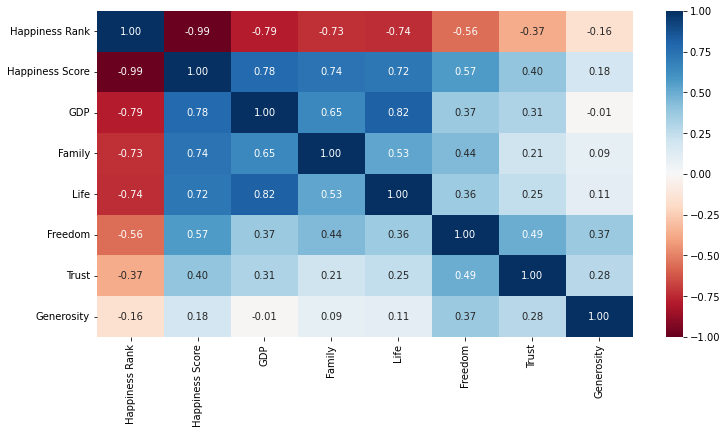

In [47]:
fig, ax = plt.subplots(figsize=(12,6))
corr=df.corr()
sns.heatmap(corr, annot=True, cmap="RdBu",vmin=-1,vmax=1,fmt=".2f")

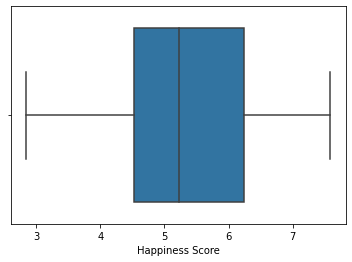

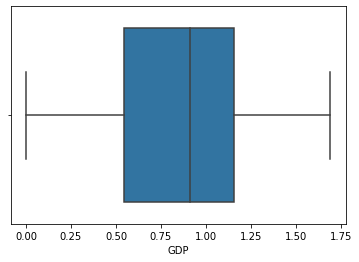

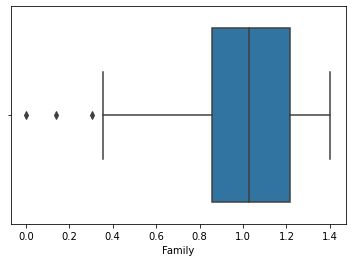

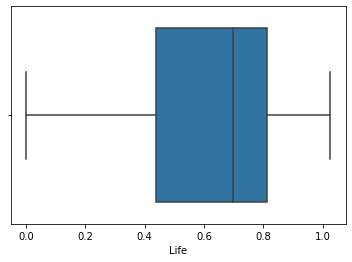

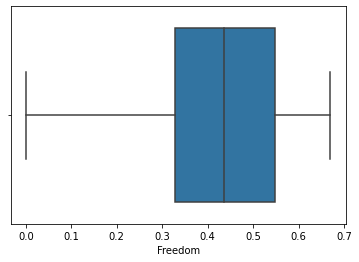

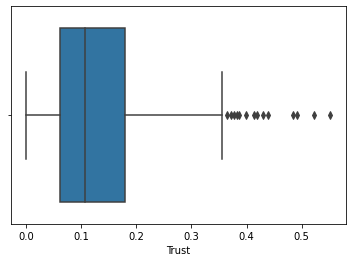

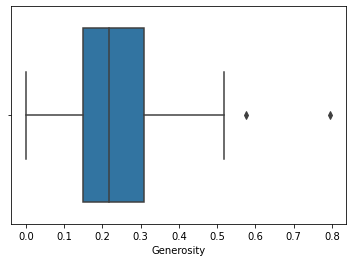

In [48]:
column_list = ["Happiness Score","GDP","Family","Life","Freedom","Trust","Generosity"]
for col in column_list:
    sns.boxplot(x = df[col])
    plt.xlabel(col)
    plt.show()

# Outlier Engineering

In [49]:
IQR = df["Trust"].quantile(0.75) - df["Trust"].quantile(0.25)

lower_boundary = df["Trust"].quantile(0.25) - (IQR * 1.5)
upper_boundary = df["Trust"].quantile(0.75) + (IQR * 1.5)
        
df["Trust"]= np.where(df["Trust"] > upper_boundary, upper_boundary,
                       np.where(df["Trust"] < lower_boundary, lower_boundary, df["Trust"])) 

<AxesSubplot: xlabel='Trust'>

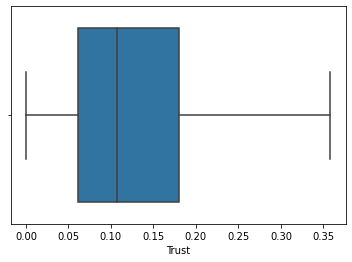

In [50]:
sns.boxplot(data=df,x="Trust")

In [51]:
IQR = df["Generosity"].quantile(0.75) - df["Generosity"].quantile(0.25)

lower_boundary = df["Generosity"].quantile(0.25) - (IQR * 1.5)
upper_boundary = df["Generosity"].quantile(0.75) + (IQR * 1.5)
        
df["Generosity"]= np.where(df["Generosity"] > upper_boundary, upper_boundary,
                       np.where(df["Generosity"] < lower_boundary, lower_boundary, df["Generosity"])) 

<AxesSubplot: xlabel='Generosity'>

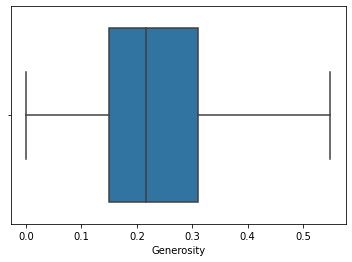

In [52]:
sns.boxplot(data=df,x="Generosity")

In [53]:
df.isnull().sum()

Country            0
Happiness Rank     0
Happiness Score    0
GDP                0
Family             0
Life               0
Freedom            0
Trust              0
Generosity         0
dtype: int64

In [54]:
df["Trust"].fillna(df["Trust"].median(),inplace=True)

In [55]:
df.isnull().sum()

Country            0
Happiness Rank     0
Happiness Score    0
GDP                0
Family             0
Life               0
Freedom            0
Trust              0
Generosity         0
dtype: int64

In [56]:
ndf = df.drop(columns=["Country","Happiness Rank"],axis=1)

In [57]:
ndf.head()

,Happiness Score,GDP,Family,Life,Freedom,Trust,Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.358125,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.141450,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.358125,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.358125,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.329570,0.45811


In [58]:
ndf.shape

(158, 7)

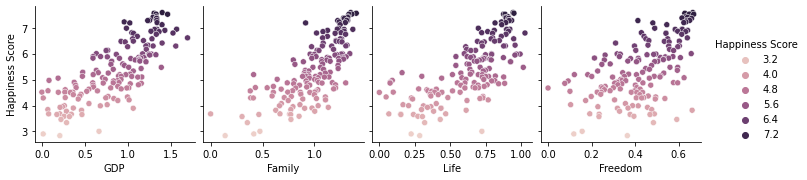

In [59]:
sns.pairplot(
    ndf,
    x_vars=["GDP","Family","Life","Freedom"],
    y_vars=["Happiness Score"],hue="Happiness Score"
)

# **Scale and Split**

In [60]:
X_train,X_test,y_train,y_test = train_test_split(ndf.drop(columns=["Happiness Score"]),ndf["Happiness Score"],test_size=0.12,random_state=0)

In [61]:
se = StandardScaler()

In [62]:
X_train = se.fit_transform(X_train)
X_test = se.fit_transform(X_test)

In [63]:
X_train.shape,X_test.shape

((139, 6), (19, 6))

In [64]:
y_train.shape,y_test.shape

((139,), (19,))

# Model Training

**Linear Regression** 

In [65]:
model_le = LinearRegression()

In [66]:
model_le.fit(X_train,y_train)

LinearRegression()

In [67]:
model_le.coef_

array([0.33410507, 0.39674558, 0.23601751, 0.2180846 , 0.11914813,
       0.01115495])

In [68]:
model_le.intercept_

5.411496402877699

In [69]:
le_y_pred = model_le.predict(X_test)

In [70]:
print(f"Linear Regression Train Score: {model_le.score(X_train,y_train)}")

Linear Regression Train Score: 0.7903893684032441


In [71]:
cross_v=cross_val_score(model_le,X_train,y_train,cv=10,scoring="r2").mean()

In [72]:
print(f"Cross Validation Score: {cross_v}")

Cross Validation Score: 0.7055100565568873


In [73]:
l_test_score = r2_score(y_test,le_y_pred)

In [74]:
print(f"Linear Regression Test Score: {l_test_score}")

Linear Regression Test Score: 0.5312073269331508


In [75]:
from sklearn.model_selection import GridSearchCV

**Random Forest Regression** 

In [76]:
rf_model = RandomForestRegressor(random_state=42).fit(X_train,y_train)

In [77]:
print("Random Forest Model Train Score:",rf_model.score(X_train,y_train)*100)
print("RF Cross Validation Score:",cross_val_score(rf_model,X_train,y_train,cv=10,scoring="r2").mean()*100)

Random Forest Model Train Score: 96.64074877652516
RF Cross Validation Score: 70.51143640328776


Random forest model overfitted.

**Decision Tree Regression**

In [78]:
dt_model = DecisionTreeRegressor(random_state=42).fit(X_train,y_train)

In [79]:
dt_y_pred = dt_model.predict(X_test)

In [80]:
dt_test_score= r2_score(y_test,dt_y_pred)

In [81]:
print("Decision Tree Train Score: ",dt_model.score(X_train,y_train))
print("Decision Tree Cross Validation Score: ",cross_val_score(dt_model,X_train,y_train,cv=10,scoring="r2").mean())
print(f"Decision Tree Test Score: {dt_test_score}")

Decision Tree Train Score:  1.0
Decision Tree Cross Validation Score:  0.4822696746410765
Decision Tree Test Score: -0.24906418197789315
